To start, we import the libraries. I have seen another person write the date time library code using from..import

I am going to follow this tutorial from Data Science for Everyone on Youtube

In [67]:
import pandas as pd
import yfinance as yf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from io import StringIO
import lxml as lxml
%matplotlib inline

yfinance has different function to call data from the website

In [19]:
hood = yf.Ticker('HOOD')
hood.info

{'address1': '85 Willow Road',
 'city': 'Menlo Park',
 'state': 'CA',
 'zip': '94025',
 'country': 'United States',
 'phone': '844 428 5411',
 'website': 'https://robinhood.com',
 'industry': 'Capital Markets',
 'industryKey': 'capital-markets',
 'industryDisp': 'Capital Markets',
 'sector': 'Financial Services',
 'sectorKey': 'financial-services',
 'sectorDisp': 'Financial Services',
 'longBusinessSummary': "Robinhood Markets, Inc. operates financial services platform in the United States. Its platform allows users to invest in stocks, exchange-traded funds (ETFs), American depository receipts, options, gold, and cryptocurrencies. The company offers fractional trading, recurring investments, fully-paid securities lending, access to investing on margin, cash sweep, instant withdrawals, retirement program, around-the-clock trading, joint investing accounts, event contracts, and future contract services. It also provides various learning and education solutions comprise Snacks, an access

In [20]:
hist = hood.history(period='max')
print(hist)

                                 Open        High         Low       Close  \
Date                                                                        
2021-07-29 00:00:00-04:00   38.000000   40.250000   33.349998   34.820000   
2021-07-30 00:00:00-04:00   34.930000   36.980000   33.250000   35.150002   
2021-08-02 00:00:00-04:00   35.970001   37.980000   35.299999   37.680000   
2021-08-03 00:00:00-04:00   37.910999   48.590000   37.159000   46.799999   
2021-08-04 00:00:00-04:00   54.450001   85.000000   54.400002   70.389999   
...                               ...         ...         ...         ...   
2025-07-28 00:00:00-04:00  105.839996  107.129997  104.660004  106.769997   
2025-07-29 00:00:00-04:00  106.610001  107.419998  103.000000  103.320000   
2025-07-30 00:00:00-04:00  103.849998  107.459999  103.349998  106.099998   
2025-07-31 00:00:00-04:00  103.864998  109.059998  101.070000  103.050003   
2025-08-01 00:00:00-04:00   97.800003  104.589996   93.360001   99.900002   

In [21]:
hood.actions #dividens or stock splits

,Dividends,Stock Splits
Date,,


In [25]:
hood.major_holders #shows diff groups of holders

Breakdown,Value
insidersPercentHeld,0.00786
institutionsPercentHeld,0.70097
institutionsFloatPercentHeld,0.70652
institutionsCount,1249.00000


In [26]:
hood.institutional_holders #shows the institutional participants holding the stock

,Date Reported,Holder,pctHeld,Shares,Value,pctChange
0,2025-03-31,Vanguard Group Inc,0.0968,74241080,7416684005,0.0859
1,2025-03-31,Blackrock Inc.,0.0528,40493408,4045291520,0.0617
2,2025-03-31,"FMR, LLC",0.0446,34224676,3419045184,-0.1494
3,2025-03-31,Newlands Management Operations LLC ...,0.0315,24158860,2413470150,0.0000
4,2025-03-31,"Renaissance Technologies, LLC",0.0217,16656416,1663975983,0.3791
5,2025-03-31,JPMORGAN CHASE & CO,0.0211,16189448,1617325879,-0.3381
6,2025-03-31,State Street Corporation,0.0189,14529217,1451468800,0.0680
7,2025-03-31,Index Venture Associates VI Ltd,0.0189,14467898,1445343032,0.0000
8,2025-03-31,"Geode Capital Management, LLC",0.0165,12668613,1265594458,0.0405
9,2025-03-31,"Shaw D.E. & Co., Inc.",0.0165,12655123,1264246807,0.6127


In [27]:
hood.balance_sheet

,2024-12-31,2023-12-31,2022-12-31,2021-12-31,2020-12-31
Ordinary Shares Number,8.844930e+08,8.721627e+08,8.927516e+08,8.639126e+08,NaN
Share Issued,8.844930e+08,8.721627e+08,8.927516e+08,8.639126e+08,NaN
Net Debt,3.131000e+09,NaN,NaN,NaN,5.184890e+08
Total Debt,7.463000e+09,3.547000e+09,1.834000e+09,3.651000e+09,NaN
Tangible Book Value,7.755000e+09,6.473000e+09,6.831000e+09,7.158000e+09,NaN
...,...,...,...,...,...
Cash Cash Equivalents And Short Term Investments,1.049600e+10,8.442000e+09,7.853000e+09,8.087000e+09,NaN
Other Short Term Investments,6.164000e+09,3.607000e+09,1.514000e+09,1.834000e+09,NaN
Cash And Cash Equivalents,4.332000e+09,4.835000e+09,6.339000e+09,6.253000e+09,NaN
Cash Equivalents,NaN,NaN,NaN,4.003552e+09,1.026034e+09


In [28]:
hood.cashflow

,2024-12-31,2023-12-31,2022-12-31,2021-12-31,2020-12-31
Free Cash Flow,-2.070000e+08,1.160000e+09,-9.090000e+08,-9.680000e+08,NaN
Repurchase Of Capital Stock,-2.570000e+08,-6.080000e+08,0.000000e+00,0.000000e+00,NaN
Repayment Of Debt,-2.300000e+07,-2.000000e+07,-2.100000e+07,-1.968000e+09,NaN
Issuance Of Debt,1.540000e+08,2.000000e+07,2.100000e+07,5.520000e+09,NaN
Issuance Of Capital Stock,NaN,0.000000e+00,0.000000e+00,2.052000e+09,1.267000e+09
...,...,...,...,...,...
Amortization Of Intangibles,6.300000e+07,5.500000e+07,3.500000e+07,NaN,NaN
Depreciation,1.400000e+07,1.600000e+07,2.600000e+07,NaN,NaN
Operating Gains Losses,NaN,NaN,NaN,2.045657e+09,NaN
Gain Loss On Investment Securities,NaN,NaN,NaN,2.045657e+09,NaN


In [30]:
hood.earnings_history

,epsActual,epsEstimate,epsDifference,surprisePercent
quarter,,,,
2024-09-30,0.2620,0.26101,0.00,0.0038
2024-12-31,1.0388,0.52176,0.52,0.9910
2025-03-31,0.4423,0.36925,0.07,0.1978
2025-06-30,0.4985,0.35325,0.15,0.4112


In [33]:
hood.eps_trend

,current,7daysAgo,30daysAgo,60daysAgo,90daysAgo
period,,,,,
0q,0.49633,0.34700,0.31575,0.33075,0.33075
+1q,0.47333,0.39200,0.35250,0.35750,0.35750
0y,1.84653,1.52740,1.47241,1.46346,1.44738
+1y,2.00261,1.85512,1.74162,1.71008,1.67607


In [34]:
hood.growth_estimates

,stockTrend,indexTrend
period,,
0q,0.8944,0.0737
+1q,-0.5443,0.0669
0y,-0.0010,0.0834
+1y,0.0845,0.1382
LTG,NaN,0.1220


In [35]:
hood.insider_transactions

,Shares,Value,URL,Text,Insider,Position,Transaction,Start Date,Ownership
0,5864,614141.0,,Sale at price 104.73 per share.,PINNER JEFFREY TSVI,Chief Technology Officer,,2025-07-25,D
1,418338,NaN,,,BHATT BAIJU PRAFULKUMAR,Director,,2025-07-24,I
2,418338,42621656.0,,Sale at price 101.88 per share.,BHATT BAIJU PRAFULKUMAR,Director,,2025-07-24,I
3,385485,NaN,,,TENEV VLADIMIR,Chief Executive Officer,,2025-07-16,D
4,385485,39279380.0,,Sale at price 101.90 per share.,TENEV VLADIMIR,Chief Executive Officer,,2025-07-16,D
...,...,...,...,...,...,...,...,...,...
145,4528,NaN,,,RUBINSTEIN JONATHAN J,Director,,2024-11-29,D
146,44832,NaN,,,QUIRK STEVEN M,Officer,,2024-11-29,D
147,119839,NaN,,,GALLAGHER DANIEL MARTIN JR,Officer,,2024-11-29,D
148,2264,NaN,,,ZOELLICK ROBERT B.,Director,,2024-11-29,D


In [36]:
hood.income_stmt

,2024-12-31,2023-12-31,2022-12-31,2021-12-31,2020-12-31
Tax Effect Of Unusual Items,-4.200000e+05,-1.050000e+06,-9.450000e+06,-5.521500e+08,NaN
Tax Rate For Calcs,2.100000e-01,2.100000e-01,2.100000e-01,2.700000e-01,NaN
Normalized EBITDA,1.135000e+09,-4.550000e+08,-8.600000e+08,4.300000e+08,NaN
Total Unusual Items,-2.000000e+06,-5.000000e+06,-4.500000e+07,-2.045000e+09,NaN
Total Unusual Items Excluding Goodwill,-2.000000e+06,-5.000000e+06,-4.500000e+07,-2.045000e+09,NaN
Net Income From Continuing Operation Net Minority Interest,1.411000e+09,-5.410000e+08,-1.028000e+09,-3.687000e+09,NaN
Reconciled Depreciation,7.700000e+07,7.100000e+07,6.100000e+07,2.600000e+07,NaN
Reconciled Cost Of Revenue,5.040000e+08,4.590000e+08,5.880000e+08,5.090000e+08,NaN
EBITDA,1.133000e+09,-4.600000e+08,-9.050000e+08,-1.615000e+09,NaN
EBIT,1.056000e+09,-5.310000e+08,-9.660000e+08,-1.641000e+09,NaN


In [37]:
hood.recommendations

,period,strongBuy,buy,hold,sell,strongSell
0,0m,4,10,7,2,0
1,-1m,4,10,7,2,0
2,-2m,5,10,6,1,0
3,-3m,6,8,7,0,0


In [49]:
data=hood.calendar
df = pd.DataFrame(data)
print(df)

  Earnings Date  Earnings High  Earnings Low  Earnings Average  Revenue High  \
0    2025-10-29          0.529          0.47           0.49633    1168000000   

   Revenue Low  Revenue Average  
0    911000000       1053372130  


In [47]:
data = hood.options
df = pd.DataFrame(data)
print(df)

             0
0   2025-08-08
1   2025-08-15
2   2025-08-22
3   2025-08-29
4   2025-09-05
5   2025-09-19
6   2025-10-17
7   2025-11-21
8   2025-12-19
9   2026-01-16
10  2026-02-20
11  2026-03-20
12  2026-04-17
13  2026-05-15
14  2026-06-18
15  2027-01-15
16  2027-12-17


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>], dtype=object)

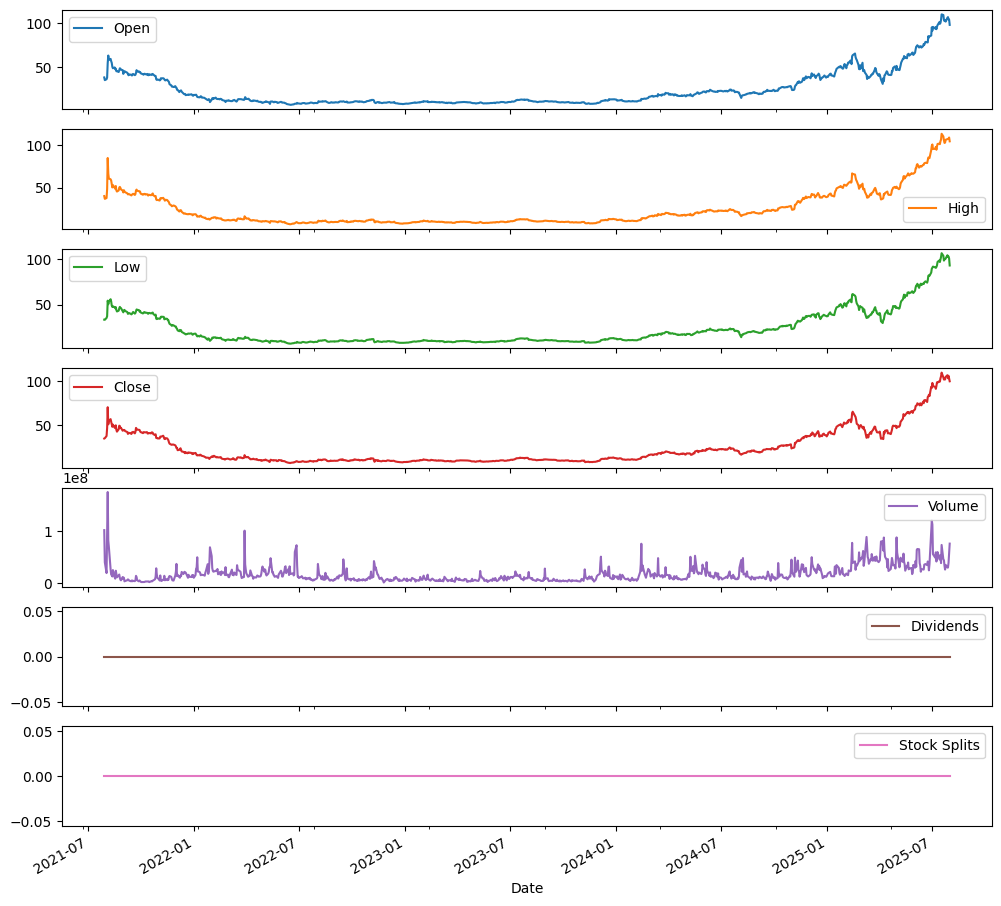

In [ ]:
hist.plot(figsize =(12, 12), subplots = True) #the subplot True value is fucking awesome